In [1]:
from simple_backtester import Strategy, Backtester
from pathlib import Path

Loading data from ../tests/test_data/data/local/feature/
Possible target features: ['close', 'price', 'return', 'volume']
Features not found: []
Features not found: []
Backtest complete.
Cumulative PnL: 0.013461453243534543
Sharpe Ratio: 0.018927171802453787
Volatility: 0.0006567162552354372
Max Drawdown: 0.017243438806816024
PnL History: [-2.37813288e-04  0.00000000e+00 -4.31513669e-19 -5.50892457e-19
 -8.56341307e-20 -5.01808859e-19  1.90459212e-19  3.17184983e-03
 -0.00000000e+00 -2.09534291e-18]


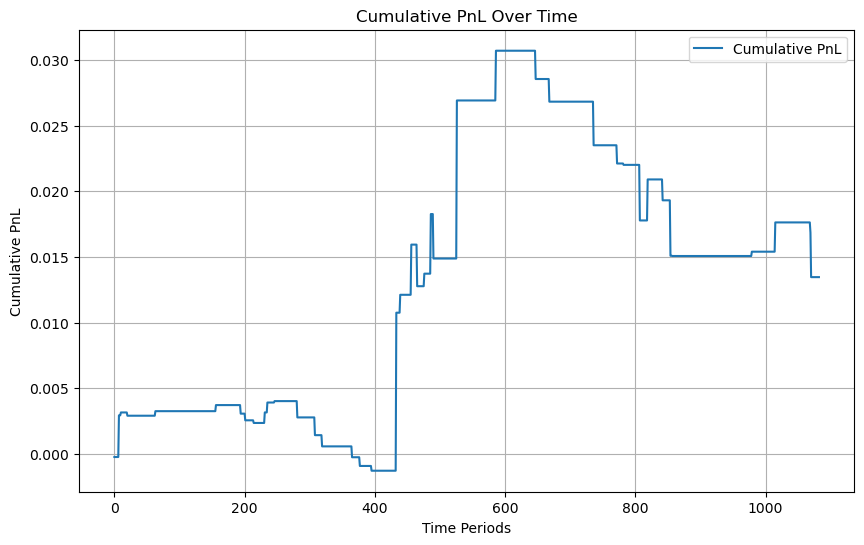

In [7]:
# Load the YAML configuration and the new strategy
strategy_module_path = "../tests/test_data/strategy/strat1.py"
config_path = "../tests/test_data/strategy/strat1.yaml"
# config = yaml.safe_load(Path(config_path).read_text())

# Dynamically load the strategy class
backtest = Backtester(strategy_module_path, config_path)
source = "local"
path = f"../tests/test_data/data/{source}/feature/"
config = {
    "source": source,
    "data_path": path,
    # "tech_indicators": ["ma", "macd", "rsi"],
    "features": [file.name[:-4] for file in Path(path).iterdir() if file.is_file()],
}
backtest.run(config)

# Get and display results
results = backtest.get_results()
print("Cumulative PnL:", results["cumulative_pnl"])
print("Sharpe Ratio:", results["Sharpe Ratio"])
print("Volatility:", results["Volatility"])
print("Max Drawdown:", results["Max Drawdown"])
print("PnL History:", results["pnl_history"][:10])

# Plot the PnL
backtest.plot_pnl()